# Assignment 2

Keith Considine 20448132

### Imports and loading dataset

In [31]:
import sklearn as sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = pd.read_csv('Iris.csv')

iris


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

I started out with some intial data exploration similar to the last assignment. Getting some basic information on the dataset to get more familiar with its structure and content.

In [32]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
iris.shape

(150, 6)

I dropped ID from the graph as the information was irrelevant

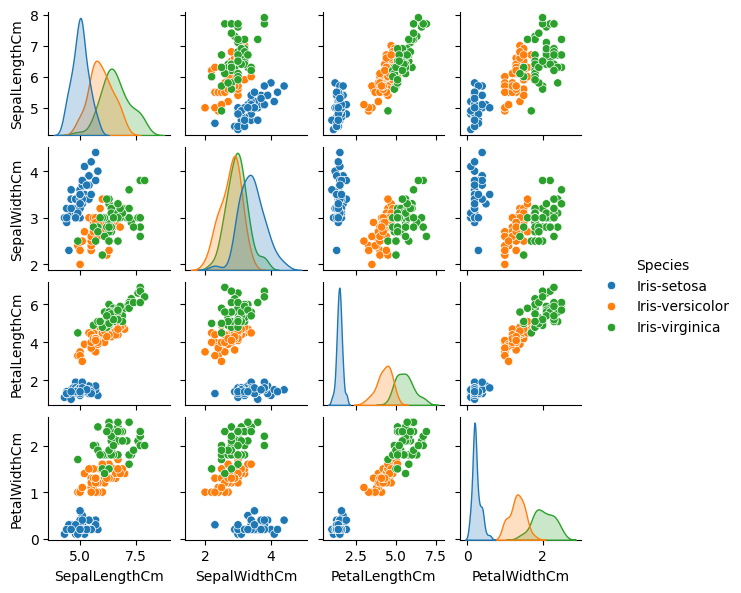

In [35]:
sns.pairplot(iris.drop(['Id'],axis=1), hue='Species', height=1.5)

Here I created my test split (80/20) and created my first model.

In [36]:
x = iris[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']]
y = iris['Species']


# Creating training data
x_train,x_test,y_train,y_test = train_test_split (x,y, test_size=0.20, random_state=2)


#max_depth=3,max_features=3,min_samples_leaf=1
clf = DecisionTreeClassifier().fit(x_train,y_train)


Below is a graph of the decision tree

[Text(0.4, 0.9, 'x[0] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[1] <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(0.2, 0.5, 'x[0] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.3, 0.3, 'x[1] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[0] <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.7, 0.3, 'x[3] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

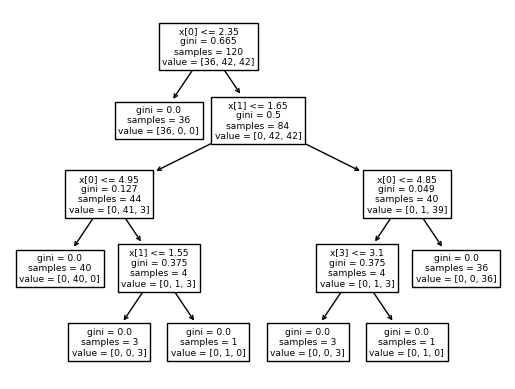

In [37]:
tree.plot_tree(clf)

Interestingly we see that the model is preforming alomost 10% worse on test data compared to training data.

In [38]:
clf.score(x_train,y_train)

1.0

In [39]:
clf.score(x_test,y_test)

0.9333333333333333

I decided to test some hyperparameters to try and improve this score. I used this for loop to print out the training and testing scores for each value of a hyperperameter. Below I am looking for the optimal max depth, I looked at the print outs to see if testing accuracy fell off at any point. I did the same for other parameters.

For max_features, 4 seemed to be the sweet spot. With scores dropping off before or after
For max_depth, 3 was also a sweet spot. For some seeds accuracy dropped slightly after this number but for most it remained the same as long as it was at least 3.
I tested some more parameters allthough they didnt appear to be very impactful.

In [40]:
for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, max_features=4, random_state=4434).fit(x_train,y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(x_train,y_train))
  print('The Testing Accuracy for max_depth {} is:'.format(max_d), model.score(x_test,y_test))
  print('')

The Training Accuracy for max_depth 1 is: 0.65
The Testing Accuracy for max_depth 1 is: 0.7333333333333333

The Training Accuracy for max_depth 2 is: 0.9666666666666667
The Testing Accuracy for max_depth 2 is: 0.9333333333333333

The Training Accuracy for max_depth 3 is: 0.9833333333333333
The Testing Accuracy for max_depth 3 is: 0.9666666666666667

The Training Accuracy for max_depth 4 is: 1.0
The Testing Accuracy for max_depth 4 is: 0.9333333333333333

The Training Accuracy for max_depth 5 is: 1.0
The Testing Accuracy for max_depth 5 is: 0.9333333333333333

The Training Accuracy for max_depth 6 is: 1.0
The Testing Accuracy for max_depth 6 is: 0.9333333333333333

The Training Accuracy for max_depth 7 is: 1.0
The Testing Accuracy for max_depth 7 is: 0.9333333333333333

The Training Accuracy for max_depth 8 is: 1.0
The Testing Accuracy for max_depth 8 is: 0.9333333333333333

The Training Accuracy for max_depth 9 is: 1.0
The Testing Accuracy for max_depth 9 is: 0.9333333333333333

The Tr

I then decided to verify my findings by testing with a number of random states. The results showed that the testing accuracy remained the same accross random states at 96.66%. This is an imporvement over not tuning peramenters with results varying depending on random state.

In [41]:
for randstate in range(1,21):
  model = DecisionTreeClassifier(max_depth=3, max_features=4, random_state=randstate).fit(x_train,y_train)
  print('The Training Accuracy for random_state {} is:'.format(randstate), model.score(x_train,y_train))
  print('The Testing Accuracy for random_state {} is:'.format(randstate), model.score(x_test,y_test))
  print('')

The Training Accuracy for random_state 1 is: 0.9833333333333333
The Testing Accuracy for random_state 1 is: 0.9666666666666667

The Training Accuracy for random_state 2 is: 0.9833333333333333
The Testing Accuracy for random_state 2 is: 0.9666666666666667

The Training Accuracy for random_state 3 is: 0.9833333333333333
The Testing Accuracy for random_state 3 is: 0.9666666666666667

The Training Accuracy for random_state 4 is: 0.9833333333333333
The Testing Accuracy for random_state 4 is: 0.9666666666666667

The Training Accuracy for random_state 5 is: 0.9833333333333333
The Testing Accuracy for random_state 5 is: 0.9666666666666667

The Training Accuracy for random_state 6 is: 0.9833333333333333
The Testing Accuracy for random_state 6 is: 0.9666666666666667

The Training Accuracy for random_state 7 is: 0.9833333333333333
The Testing Accuracy for random_state 7 is: 0.9666666666666667

The Training Accuracy for random_state 8 is: 0.9833333333333333
The Testing Accuracy for random_state 8 

# Evaluation

Below I did some evaluations of the model with tuned hyperparameters. I first did a test to see of the model could predict some values correctly (which it did). I then created a confusion matrix. Then I printed out the scores for a number of metrics.

In [42]:
clf = DecisionTreeClassifier(max_depth=3, max_features=4).fit(x_train,y_train)
y_preds = clf.predict(x_test)
print(y_preds[:15])
print(y_test[:15])

['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']
6          Iris-setosa
3          Iris-setosa
113     Iris-virginica
12         Iris-setosa
24         Iris-setosa
129     Iris-virginica
25         Iris-setosa
108     Iris-virginica
128     Iris-virginica
45         Iris-setosa
48         Iris-setosa
42         Iris-setosa
35         Iris-setosa
5          Iris-setosa
85     Iris-versicolor
Name: Species, dtype: object


In [43]:
conf_mat = confusion_matrix(y_test, y_preds)
print(conf_mat)

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [44]:
print ("Accuracy Score = " + str(accuracy_score(y_test, y_preds)))
print ("Recall Score = " + str(recall_score(y_test, y_preds, average='macro')))
print ("Percision Score = " + str(precision_score(y_test, y_preds, average='macro')))
print ("F1-Score = " + str(f1_score(y_test, y_preds, average='macro')))

Accuracy Score = 0.9666666666666667
Recall Score = 0.9583333333333334
Percision Score = 0.9629629629629629
F1-Score = 0.9581699346405229


Above are some metrics of my model. I was working with accuracy prior to this so it's intersting to see how the model held up on other metrics.

# Visualisation

Below is a graph of my final model after hyperparameter tuning. 

[Text(0.375, 0.875, 'x[1] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[1] <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[0] <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]')]

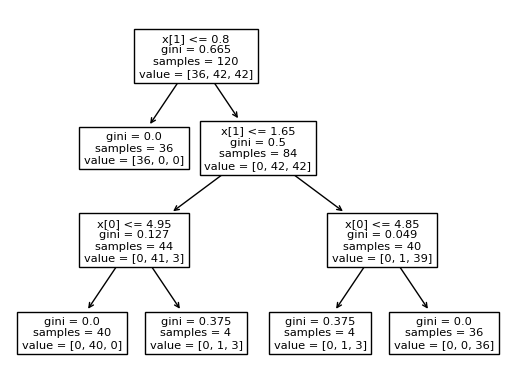

In [45]:
tree.plot_tree(clf)

# Conclusion/Summary

I think the few changes I made to the hyperparamaters had a good impact in improving the models scores. Accuracy was the metric I was testing with however all metrics are above 95% which seems very high, I think its important to note however that this is a relatively small dataset so i'm curious how the datasets size and complexity would impact the scores. I found the hyperparameter tuning process quite interesting and I'm interested in finding better methods for optimization and automation of this process in future. While doing the hyperparameter tuning I found that alot of the parameter changing wasnt very impactful, in that tuning the values didnt increase of decrease scores greatly if at all. I'm assuming this too may be because of dataset size. It was interesting getting a simple model set up and going through the process of improving and evaluating it.